In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:

alpha = 10.0
folder = f"tj-alpha{alpha}"
_r,_n = np.loadtxt(f"{folder}/profiles.txt", unpack = True)

print(_n.shape)

(1041420,)


In [53]:
csv = np.loadtxt(f"{folder}/output.csv",skiprows=1,delimiter=',')
# csv = np.unique(csv, axis=0)
# csv.shape
csv=csv
print("csv shape", csv.shape)

csv shape (19097, 5)


In [54]:
nbins=60
ns = _n.reshape((-1, nbins))
rs = _r.reshape((-1, nbins))
# ns.shape

# skip = 0
print("original shape", ns.shape)
ns = ns[:csv.shape[0],:]
vol = csv[:,-1]

print("final shape", ns.shape)
print("csv shape", csv.shape)

original shape (17357, 60)
final shape (17357, 60)
csv shape (19097, 5)


In [55]:
r = rs.mean(axis=0)
rho_avg = ns.mean(axis=0)

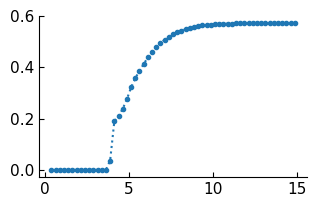

In [56]:
plt.plot(r,rho_avg,'.:')


In [57]:
# calculate fluctuation from the covariance.

def compute_chi(rhos,volumes, axis=0,stride=1,verbose=False):
    if verbose: print("The number of indeendent samples is", volumes[::stride].shape[0])
    avg_v = volumes[::stride].mean()
    avg_rho = rhos[::stride].mean(axis=axis)
    avg_rho_v = np.mean(volumes[::stride,np.newaxis]*rhos[::stride], axis=axis)
    return -(avg_rho_v-avg_v*avg_rho)


The number of indeendent samples is 19097


ValueError: operands could not be broadcast together with shapes (19097,1) (17357,60) 

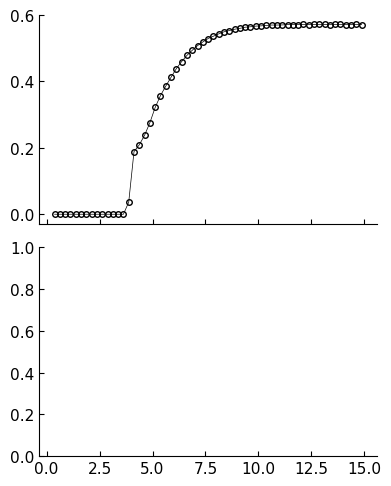

In [58]:
fix,ax = plt.subplots(2,1,figsize=(4,5),sharex=True)

ns[:,0]=0


ax[0].plot(r,rho_avg,'-ok', ms=4, lw=0.5, mfc='None')

chi = compute_chi(ns,vol,stride=1, verbose=True)
ax[1].plot(r,chi,'-ok', ms=4, lw=0.5, mfc='None')
T = 1.1476
kappa_b = 1.5
ax[1].plot(r, np.ones_like(r)*kappa_b*rho_avg[-1]*T,'-',color='tab:orange')
ax[1].text(0.8,1.2,r"$\kappa_b \rho_b T$", color='tab:orange')
ax[1].set_xlabel("$r/\sigma$")
ax[1].set_ylabel(r"$\langle\rho(r)\rangle\langle V\rangle-\langle \rho(r) V\rangle $")
ax[0].set_ylabel(r"$\langle\rho(r)\rangle $")
plt.savefig(f"{folder}/plot.profiles.pdf")